In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.cluster import KMeans

In [15]:
#Prepare data:
#import data file:
data_raw = pd.read_csv('220511_monatszahlenmonatszahlen2204_verkehrsunfaelle.csv')
data_raw.rename(columns = {'MONATSZAHL': 'category'}, inplace = True)
data_raw.rename(columns = {'JAHR': 'year'}, inplace = True)
data_raw.rename(columns = {'MONAT': 'month'}, inplace = True)
data_raw.rename(columns = {'WERT': 'value'}, inplace = True)

# drop unecessary columns 
data_raw.drop(["VORJAHRESWERT", "VERAEND_VORMONAT_PROZENT", "VERAEND_VORJAHRESMONAT_PROZENT", "ZWOELF_MONATE_MITTELWERT"], axis = 1, inplace = True)
# drop 2022 and 2021
data_raw = data_raw[data_raw['year'] != 2022]
#data_raw = data_raw[data_raw['year'] != 2021]
#only look at total number of accidents (Ausprägung is not important)
data_raw = data_raw[data_raw['AUSPRAEGUNG'] == 'insgesamt']
data_raw.drop(['AUSPRAEGUNG'], axis = 1, inplace = True)
#change datatype to integer
data_raw.loc[:,('value')] = data_raw['value'].astype(int)

#dataframe with total number of accidents per year
data_yearly = data_raw[data_raw['month'] == 'Summe']
data_yearly.drop(['month'], axis = 1, inplace = True)
data_yearly = data_yearly.reset_index(drop = True)
#dataframe with monthly values
data_monthly = data_raw[data_raw['month']!='Summe']
#data_monthly['month'] = data_monthly['month'].str[4:]
data_monthly.loc[:,('month')] = data_monthly['month'].str[4:]
data_monthly= data_monthly.reset_index(drop = True)

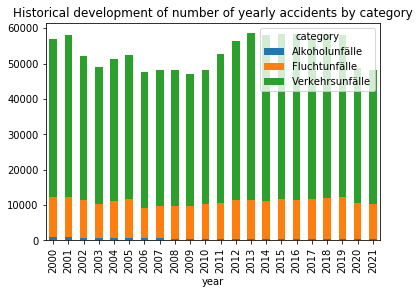

In [3]:
# Plot yearly data without forecast
data_yearly_wide = pd.pivot_table(data_yearly,index=['year'], columns='category',values='value').reset_index()
# plot data in stack manner of bar type
data_yearly_wide.plot(x='year', kind='bar', stacked=True,
        title='Historical development of number of yearly accidents by category')
plt.show()

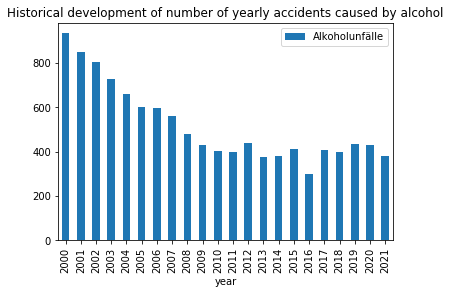

In [4]:
data_yearly_wide.plot(x='year', y='Alkoholunfälle' ,kind='bar',
        title='Historical development of number of yearly accidents caused by alcohol')
plt.show()

In [17]:
# data for forecast
#use only data from 2010 on
data_monthly_alcohol = data_monthly[data_monthly['category']=='Alkoholunfälle']
data_monthly_alcohol.drop(['category'], axis = 1, inplace = True)
data_monthly_alcohol.loc[:,('month')] = data_monthly_alcohol['month'].astype(int)
#add category: value of previous year for same month
data_monthly_alcohol.loc[:,('previous_year')] = data_monthly_alcohol['value'].shift(-12, axis = 0)
data_monthly_alcohol = data_monthly_alcohol[data_monthly_alcohol['year'] >= 2001]
#change regarding last year
data_monthly_alcohol.loc[:,('change')] = data_monthly_alcohol['value'] - data_monthly_alcohol['previous_year']
print(data_monthly_alcohol)

     year  month  value  previous_year  change
0    2021      1     16           28.0   -12.0
1    2021      2     14           40.0   -26.0
2    2021      3     24           27.0    -3.0
3    2021      4     16           26.0   -10.0
4    2021      5     24           40.0   -16.0
..    ...    ...    ...            ...     ...
247  2001      8     60           77.0   -17.0
248  2001      9    107           84.0    23.0
249  2001     10     77           83.0    -6.0
250  2001     11     68           71.0    -3.0
251  2001     12     66           85.0   -19.0

[252 rows x 5 columns]


In [6]:
a = data_monthly_alcohol[data_monthly_alcohol['year']>=2015]
b = a[a['year']<=2021]

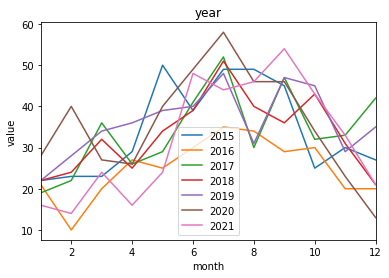

In [7]:
fig, ax = plt.subplots()
for i, group in b.groupby('year'):
    group.plot(x='month', y='value', ax=ax, label=group["year"].iloc[1])
ax.set_title("year")
ax.set_ylabel("value")
plt.show()

In [21]:
X_train = data_monthly_alcohol[data_monthly_alcohol['year'] <= 2020]
X_train = X_train[data_monthly_alcohol['year'] >= 2010]
X_try = data_monthly_alcohol[data_monthly_alcohol['year'] >= 2021]
X_train=X_train.values
X_try=X_try.values
Y_train=X_train[:,2]
Y_try = X_try[:,2]
X_train=X_train[:,[1]]
X_try=X_try[:,[1]]

C:\Users\Ani\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


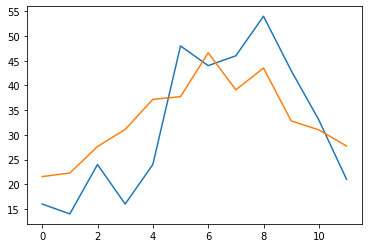

In [9]:
from sklearn.ensemble import GradientBoostingRegressor

GB_model = GradientBoostingRegressor()
GB_model.fit(X_train, Y_train)
y_pred_GB =GB_model.predict(X_try)

plt.plot(Y_try)
plt.plot(y_pred_GB)
plt.show()